<a href="https://colab.research.google.com/github/Ehsaas-Tiwari/Big-Sales-Prediction/blob/main/BigSalesPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Big Sale Prediction using Random Forest Regressor**

## Project Overview

This project aims to predict the sales of products at various outlets of a retail store chain using machine learning techniques. We have used a **Random Forest Regressor (RFR)** model to forecast the `Item_Outlet_Sales` based on various product and outlet features. The model helps retailers in demand forecasting, inventory management, and strategic planning.

---

## Dataset Description

The dataset consists of historical sales data for various products across different outlet locations. The target variable is:

- `Item_Outlet_Sales` — sales of a particular product at a particular outlet.

### Features used:

| Feature | Description |
|---------|-------------|
| `Item_Identifier` | Unique ID for each product |
| `Item_Weight` | Weight of the product |
| `Item_Fat_Content` | Whether the product is low fat or regular |
| `Item_Visibility` | % of total display area allocated to this product in the store |
| `Item_Type` | Category to which the product belongs |
| `Item_MRP` | Maximum Retail Price of the product |
| `Outlet_Identifier` | Unique ID of the outlet |
| `Outlet_Establishment_Year` | Year when the outlet was established |
| `Outlet_Size` | Size of the outlet (Small, Medium, High) |
| `Outlet_Location_Type` | Tier of the city where the outlet is located |
| `Outlet_Type` | Type of outlet (Grocery Store, Supermarket Type1/2/3) |

---

## Problem Statement

Predict `Item_Outlet_Sales` for each product at a particular outlet using the provided features. This is a **regression problem**.

---

## Project Pipeline

1. **Data Loading & Exploration**
   - Loaded dataset using pandas
   - Checked for missing values and basic statistics

2. **Data Preprocessing**
   - Handled missing values
   - Encoded categorical variables using One-Hot Encoding
   - Normalized/Standardized numerical features

3. **Hyperparameter Tuning**
   - Performed hyperparameter tuning using RandomizedSearchCV
   - Got the best estimator

4. **Model Selection**
   - Trained a `RandomForestRegressor` using scikit-learn
   - Evaluated model on train/test set using R², MAE, MSE

5. **Results & Evaluation**
   - Compared actual vs predicted sales
   - Visualized feature importance
   - Final model performance metrics

---

## Model Performance

| Metric | Train Set | Test Set |
|--------|-----------|----------|
| R² Score | 0.69 | 0.53 |
| MAE | 653.99 | 804.71 |
| MSE | 998802.13| 1579228.60 |


---

## Key Insights

- Item MRP was the most influential feature in predicting sales.
- Outlet type and size significantly affect the sales.
- RFR performed well with minimal overfitting after tuning.

---

# **Importing basic libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Loading the dataset**

In [2]:
df = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/refs/heads/main/Big%20Sales%20Data.csv')

# **Exploratory Data Analysis**

In [3]:
df.shape

(14204, 12)

In [4]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDT36,12.3,Low Fat,0.111448,Baking Goods,33.4874,OUT049,1999,Medium,Tier 1,Supermarket Type1,436.608721
1,FDT36,12.3,Low Fat,0.111904,Baking Goods,33.9874,OUT017,2007,Medium,Tier 2,Supermarket Type1,443.127721
2,FDT36,12.3,LF,0.111728,Baking Goods,33.9874,OUT018,2009,Medium,Tier 3,Supermarket Type2,564.598400
3,FDT36,12.3,Low Fat,0.000000,Baking Goods,34.3874,OUT019,1985,Small,Tier 1,Grocery Store,1719.370000
4,FDP12,9.8,Regular,0.045523,Baking Goods,35.0874,OUT017,2007,Medium,Tier 2,Supermarket Type1,352.874000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11815 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [6]:
df.isna().sum()

,0
Item_Identifier,0
Item_Weight,2389
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


In [7]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11815.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.788355,0.065953,141.004977,1997.830681,2185.836320
std,4.654126,0.051459,62.086938,8.371664,1827.479550
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,922.135101
50%,12.500000,0.054021,142.247000,1999.000000,1768.287680
75%,16.750000,0.094037,185.855600,2004.000000,2988.110400
max,30.000000,0.328391,266.888400,2009.000000,31224.726950


In [8]:
df.nunique()

,0
Item_Identifier,1559
Item_Weight,416
Item_Fat_Content,5
Item_Visibility,13006
Item_Type,16
Item_MRP,8052
Outlet_Identifier,10
Outlet_Establishment_Year,9
Outlet_Size,3
Outlet_Location_Type,3


In [9]:
df.select_dtypes(include='object').columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [10]:
df.select_dtypes(exclude='object').columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [11]:
for i in df.select_dtypes(include='object').columns:
  print(df[i].value_counts())
  print('\n*************')

Item_Identifier
FDW24    10
FDG47    10
FDT36    10
FDH21    10
FDG33    10
         ..
DRN11     7
FDH58     7
NCW54     7
FDO33     7
NCL42     7
Name: count, Length: 1559, dtype: int64

*************
Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: count, dtype: int64

*************
Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: count, dtype: int64

*************
Outlet_Identifier
OUT027    1559
OUT013    1553
OUT035    1550
OUT049    1550
OUT046    1550
OUT045    1548
OUT018    1546
OUT01

In [12]:
df.replace({'Item_Fat_Content': {'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'} }, inplace=True)

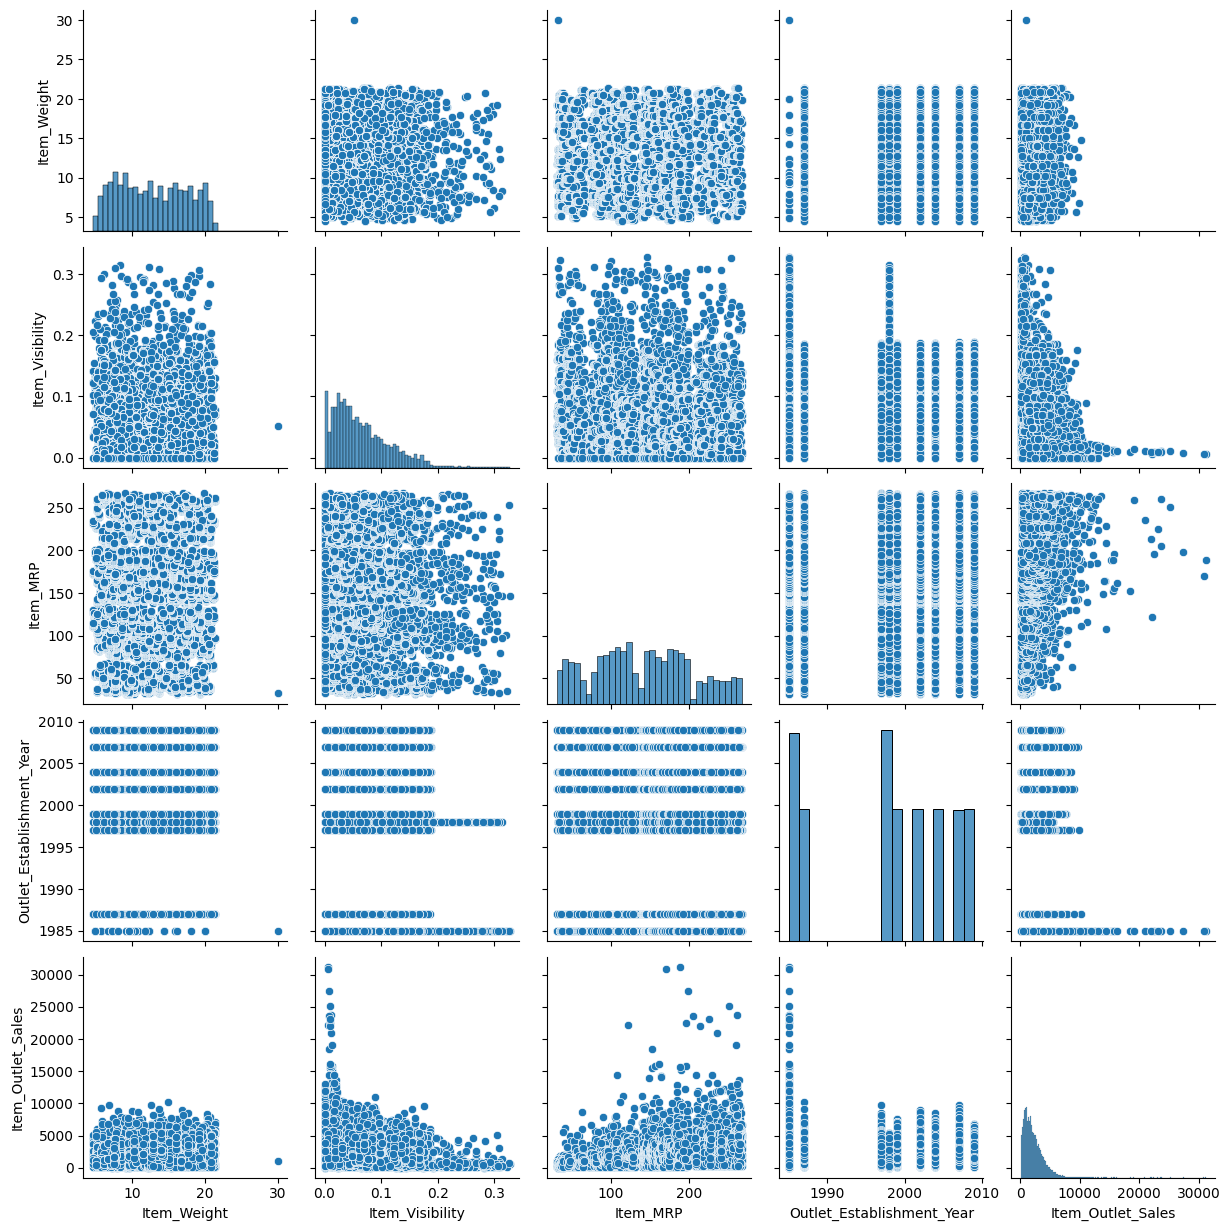

In [13]:
sns.pairplot(df)

# **Separating Features and Target**

In [14]:
X = df.drop(['Item_Outlet_Sales', 'Item_Identifier'],axis=1)
y = df['Item_Outlet_Sales']

In [15]:
cat_cols = X.select_dtypes(include='object').columns
num_cols = X.select_dtypes(exclude='object').columns

# **Train Test Split**

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
X_train.shape

(9942, 10)

In [18]:
X_test.shape

(4262, 10)

# **Data Preprocessing**

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

num_pipe = Pipeline([
    ('impute', SimpleImputer(strategy='mean')),
    ('scale', StandardScaler())
])

cat_pipe = Pipeline([
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore'))
])

transformer = ColumnTransformer([
    ('num', num_pipe, num_cols),
    ('cat', cat_pipe, cat_cols)
], remainder='passthrough')

X_train_processed = transformer.fit_transform(X_train)
X_test_processed = transformer.transform(X_test)

In [20]:
X_train_processed.shape, X_test_processed.shape

((9942, 42), (4262, 42))

# **Hyperparameter Tuning**

In [22]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [100,200,300],
    'max_depth': [10,20,30],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4]
}

random_search = RandomizedSearchCV(model, param_grid, cv=5, n_jobs=-1, verbose=2)
random_search.fit(X_train_processed, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   verbose=2)

# **Model: RandomForestRegressor**

In [23]:
random_search.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_depth': 10}

In [24]:
best_model = random_search.best_estimator_

In [25]:
best_model.fit(X_train_processed, y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=5,
                      n_estimators=200, random_state=42)

In [26]:
best_model.score(X_train_processed, y_train)

0.6988951113609092

# **Model Evaluation**

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = best_model.predict(X_test_processed)
y_pred_train = best_model.predict(X_train_processed)

print('Training R2 Score:', r2_score(y_train, y_pred_train))
print('Testing R2 Score:', r2_score(y_test, y_pred))

print('Training Mean Absolute Error:', mean_absolute_error(y_train, y_pred_train))
print('Testing Mean Absolute Error:', mean_absolute_error(y_test, y_pred))

print('Training Mean Squared Error:', mean_squared_error(y_train, y_pred_train))
print('Testing Mean Squared Error:', mean_squared_error(y_test, y_pred))

Training R2 Score: 0.6988951113609092
Testing R2 Score: 0.5341231916100744
Training Mean Absolute Error: 653.9908834485437
Testing Mean Absolute Error: 804.7171549195841
Training Mean Squared Error: 998802.1387146551
Testing Mean Squared Error: 1579228.6051673258


# **Visualising Actual vs Predicted Values**

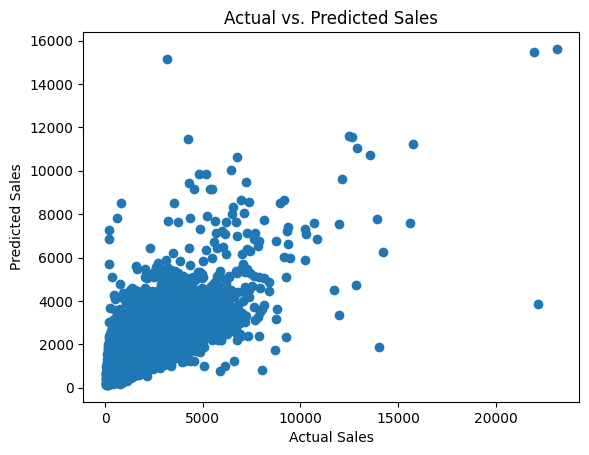

In [32]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')
plt.show()